# Esercizitazione Pandas e MatPlotLib 2

**Esercizio 1.**

* Scarica il dataset presente nel compito su classroom
* Crea un DataFrame a partire dal dataset scaricato
* Prepara il DataFrame per l'utilizzo
* Stampa le prime 5 righe del DataFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Caricare il dataset
data = pd.read_csv('high_popularity_spotify_data.csv')

# 2. Creazione del DataFrame
df = pd.DataFrame(data)

# 3. Preparazione del DataFrame
# Verifica valori mancanti e gestione
if df['track_album_name'].isnull().sum() > 0:
    df['track_album_name'] = df['track_album_name'].fillna('Unknown Album')

# 4. Stampa le prime 5 righe del DataFrame
print("Prime 5 righe del DataFrame:")
print(df.head(5))


Prime 5 righe del DataFrame:
   energy    tempo  danceability playlist_genre  loudness  liveness  valence  \
0   0.592  157.969         0.521            pop    -7.777     0.122    0.535   
1   0.507  104.978         0.747            pop   -10.171     0.117    0.438   
2   0.808  108.548         0.554            pop    -4.169     0.159    0.372   
3   0.910  112.966         0.670            pop    -4.070     0.304    0.786   
4   0.783  149.027         0.777            pop    -4.477     0.355    0.939   

            track_artist  time_signature  speechiness  ...  instrumentalness  \
0  Lady Gaga, Bruno Mars               3       0.0304  ...            0.0000   
1          Billie Eilish               4       0.0358  ...            0.0608   
2          Gracie Abrams               4       0.0368  ...            0.0000   
3      Sabrina Carpenter               4       0.0634  ...            0.0000   
4       ROSÉ, Bruno Mars               4       0.2600  ...            0.0000   

         

**Esercizio 2.**

* Seleziona e stampa tutti i brani con popolarità maggiore di 80
* Selezione e stampa il numero di brani per ogni genere della playlist

In [3]:
# Seleziona e stampa tutti i brani con popolarità maggiore di 80
popular_tracks = df[df['track_popularity'] > 80]
print("Brani con popolarità maggiore di 80:")
print(popular_tracks)

# Seleziona e stampa il numero di brani per ogni genere della playlist
genre_counts = df['playlist_genre'].value_counts()
print("Numero di brani per ogni genere della playlist:")
print(genre_counts)

Brani con popolarità maggiore di 80:
      energy    tempo  danceability playlist_genre  loudness  liveness  \
0      0.592  157.969         0.521            pop    -7.777    0.1220   
1      0.507  104.978         0.747            pop   -10.171    0.1170   
2      0.808  108.548         0.554            pop    -4.169    0.1590   
3      0.910  112.966         0.670            pop    -4.070    0.3040   
4      0.783  149.027         0.777            pop    -4.477    0.3550   
...      ...      ...           ...            ...       ...       ...   
1557   0.750  155.096         0.732        hip-hop    -6.366    0.1090   
1565   0.763  120.042         0.695        hip-hop    -3.497    0.0863   
1598   0.745  180.098         0.464        hip-hop    -3.202    0.3630   
1601   0.787  119.996         0.704     electronic    -6.751    0.1590   
1684   0.642   83.389         0.463          latin    -4.474    0.0686   

      valence                  track_artist  time_signature  speechiness  

**Esercizio 3.**

* Calcola la media e la deviazione standard della popolarità
* Stampa i 5 brani più lunghi


In [7]:
# Calcolare la media e la deviazione standard della popolarità
media_popolarita = df['track_popularity'].mean()
deviazione_popolarita = df['track_popularity'].std()

print(f"Media della popolarità: {media_popolarita}")
print(f"Deviazione standard della popolarità: {deviazione_popolarita}")


# Ordinare i brani per durata in ordine decrescente
brani_lunghi = df.sort_values(by='duration_ms', ascending=False).head(5)

# Stampare i 5 brani più lunghi
print('-------------------------------------------------------------------------------------')
print('I brani più lunghi sono:')
print(brani_lunghi[['track_name', 'duration_ms']])

Media della popolarità: 75.80604982206405
Deviazione standard della popolarità: 6.032531899852568
-------------------------------------------------------------------------------------
I brani più lunghi sono:
                          track_name  duration_ms
1225                       Free Bird       547107
112                     American Pie       516893
578                Master Of Puppets       515387
77    Master of Puppets (Remastered)       515387
1113               Master Of Puppets       515387


**Esercizio 4.**

* Stampa gli artisti che compaiono più di 3 volte nel dataset
* Stampa i brani appartenenti al genere "pop" con una ballabilità superiore a 0.8.


In [8]:

# Conta quante volte ogni artista appare nel dataset
artisti_count = df['track_artist'].value_counts()

# Filtra gli artisti che compaiono più di 3 volte
artisti_frequenti = artisti_count[artisti_count > 3]

# Stampa gli artisti
print("Artisti che compaiono più di 3 volte:")
print(artisti_frequenti)


# Filtra i brani con genere "pop" e ballabilità maggiore di 0.8
brani_pop_ballabilita_alta = df[(df['playlist_genre'] == 'pop') & (df['danceability'] > 0.8)]

# Stampa i brani filtrati
print('--------------------------------------------------------------------------------------')
print("Brani 'pop' con ballabilità superiore a 0.8:")
print(brani_pop_ballabilita_alta[['track_name', 'track_artist', 'danceability']])

Artisti che compaiono più di 3 volte:
track_artist
Bad Bunny                20
Linkin Park              14
Hozier                   11
Sabrina Carpenter        11
Red Hot Chili Peppers    10
                         ..
ABBA                      4
Polo G                    4
Ariana Grande             4
Wizkid, Brent Faiyaz      4
Myles Smith               4
Name: count, Length: 74, dtype: int64
--------------------------------------------------------------------------------------
Brani 'pop' con ballabilità superiore a 0.8:
                                             track_name  \
22                                               Mantra   
23                                       Qué Pasaría...   
30                WHATCHU KNO ABOUT ME (with Sexyy Red)   
37                         Si Antes Te Hubiera Conocido   
41                                          Not Like Us   
43                                                  +57   
44                                           Embrace It   

**Esercizio 5.**


**Grafico a barre**
* Crea un grafico a barre per mostrare il numero di brani per genere
* Stampa i dati utilizzati per il grafico


Numero di brani per genere:
playlist_genre
pop           357
rock          235
hip-hop       227
latin         184
electronic    148
gaming        100
ambient        61
r&b            50
arabic         50
punk           50
blues          45
metal          35
folk           33
afrobeats      20
brazilian      14
j-pop          11
k-pop          11
classical      10
indian          9
korean          8
turkish         7
reggae          5
indie           4
world           4
country         3
soul            2
lofi            2
jazz            1
Name: count, dtype: int64


/tmp/ipykernel_6809/2021716763.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteggio_genere.index, y=conteggio_genere.values, palette="viridis")


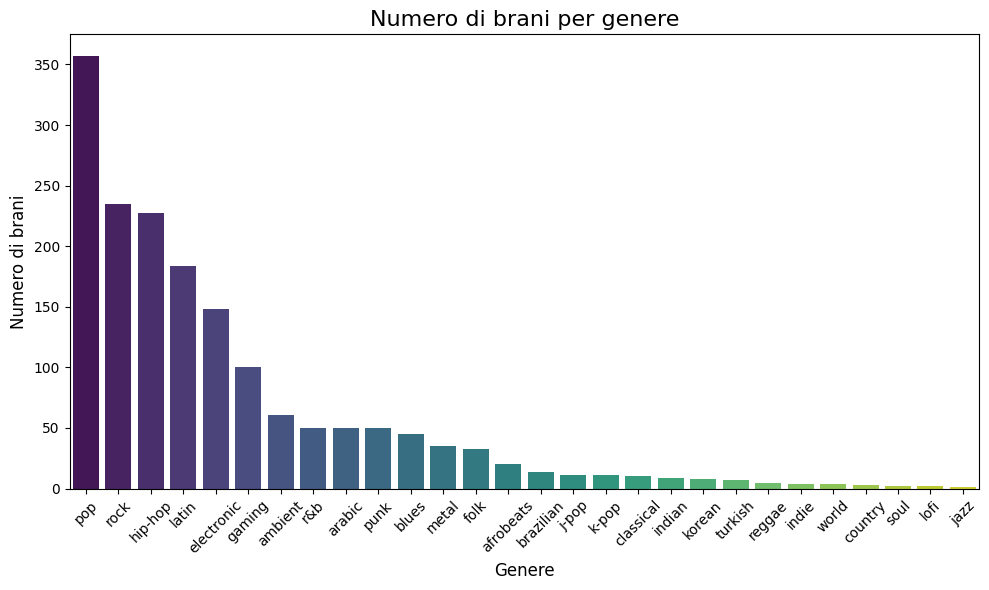

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conta il numero di brani per ogni genere
conteggio_genere = df['playlist_genre'].value_counts()

# Stampa i dati utilizzati per il grafico
print("Numero di brani per genere:")
print(conteggio_genere)

# Imposta il grafico a barre con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=conteggio_genere.index, y=conteggio_genere.values, palette="viridis")

# Aggiungi titolo e etichette
plt.title('Numero di brani per genere', fontsize=16)
plt.xlabel('Genere', fontsize=12)
plt.ylabel('Numero di brani', fontsize=12)

# Ruota le etichette dell'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.show()

**Esercizio 6.**

**Grafico scatter plot**
* Crea un grafico scatter plot tra la popolarità e la ballabilità
* Stampa i dati utilizzati per il grafico


Dati utilizzati per il grafico scatter plot:
   track_popularity  danceability
0               100         0.521
1                97         0.747
2                93         0.554
3                81         0.670
4                98         0.777


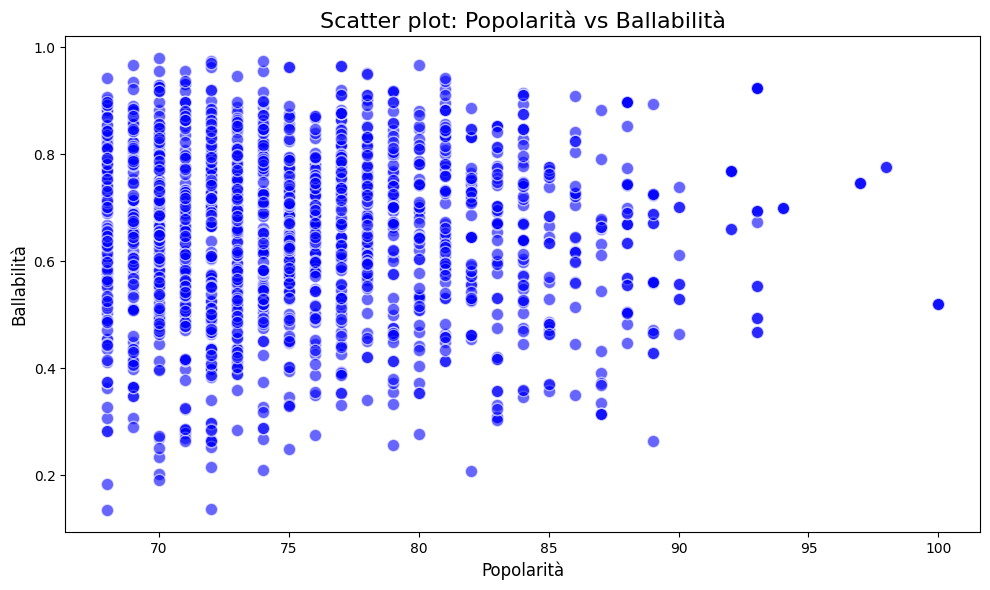

In [11]:
# Estrai le colonne di interesse per il grafico
dati_scatter = df[['track_popularity', 'danceability']]

# Stampa i dati utilizzati per il grafico
print("Dati utilizzati per il grafico scatter plot:")
print(dati_scatter.head())


# Imposta il grafico scatter plot con matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(dati_scatter['track_popularity'], dati_scatter['danceability'], alpha=0.6, c='blue', edgecolors='w', s=80)

# Aggiungi titolo e etichette
plt.title('Scatter plot: Popolarità vs Ballabilità', fontsize=16)
plt.xlabel('Popolarità', fontsize=12)
plt.ylabel('Ballabilità', fontsize=12)

# Mostra il grafico
plt.tight_layout()
plt.show()

**Esercizio 7.**

**Grafico boxplot**
* Crea un grafico boxplot che mostri la suddivisione della durata dei brani per sottogenere
* Stampa i dati utilizzati per il grafico


Dati utilizzati per il grafico boxplot:
  playlist_subgenre  duration_ms
0        mainstream       251668
1        mainstream       210373
2        mainstream       166300
3        mainstream       157280
4        mainstream       169917


/tmp/ipykernel_6809/1464982456.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_subgenre', y='duration_ms', data=dati_boxplot, palette="Set2")


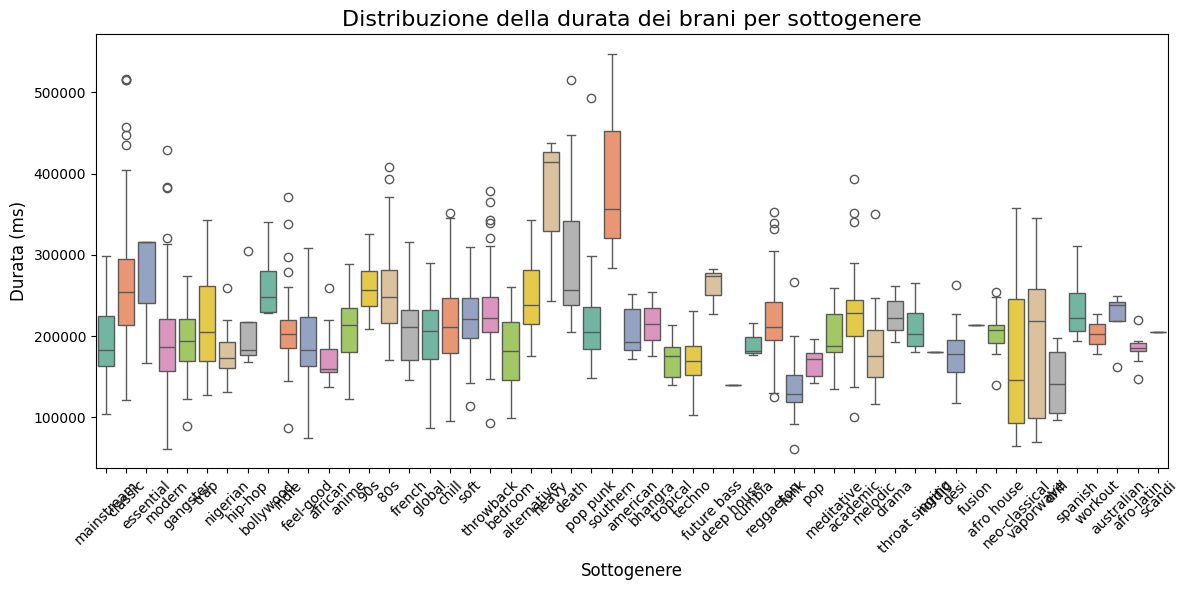

In [12]:
# Estrai le colonne necessarie per il grafico
dati_boxplot = df[['playlist_subgenre', 'duration_ms']]

# Stampa i dati utilizzati per il grafico
print("Dati utilizzati per il grafico boxplot:")
print(dati_boxplot.head())


import seaborn as sns
import matplotlib.pyplot as plt

# Imposta il grafico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='playlist_subgenre', y='duration_ms', data=dati_boxplot, palette="Set2")

# Aggiungi titolo e etichette
plt.title('Distribuzione della durata dei brani per sottogenere', fontsize=16)
plt.xlabel('Sottogenere', fontsize=12)
plt.ylabel('Durata (ms)', fontsize=12)

# Ruota le etichette dell'asse X per miglior leggibilità
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.show()

**Esercizio 8.**

**Grafico a torta**
* Crea un grafico a torta per mostrare la distribuzione in percentuale dei generi delle playlist.
* Stampa i dati utilizzati per il grafico


Distribuzione in percentuale dei generi delle playlist:
playlist_genre
pop           21.174377
rock          13.938316
hip-hop       13.463820
latin         10.913405
electronic     8.778173
gaming         5.931198
ambient        3.618031
r&b            2.965599
arabic         2.965599
punk           2.965599
blues          2.669039
metal          2.075919
folk           1.957295
afrobeats      1.186240
brazilian      0.830368
j-pop          0.652432
k-pop          0.652432
classical      0.593120
indian         0.533808
korean         0.474496
turkish        0.415184
reggae         0.296560
indie          0.237248
world          0.237248
country        0.177936
soul           0.118624
lofi           0.118624
jazz           0.059312
Name: proportion, dtype: float64


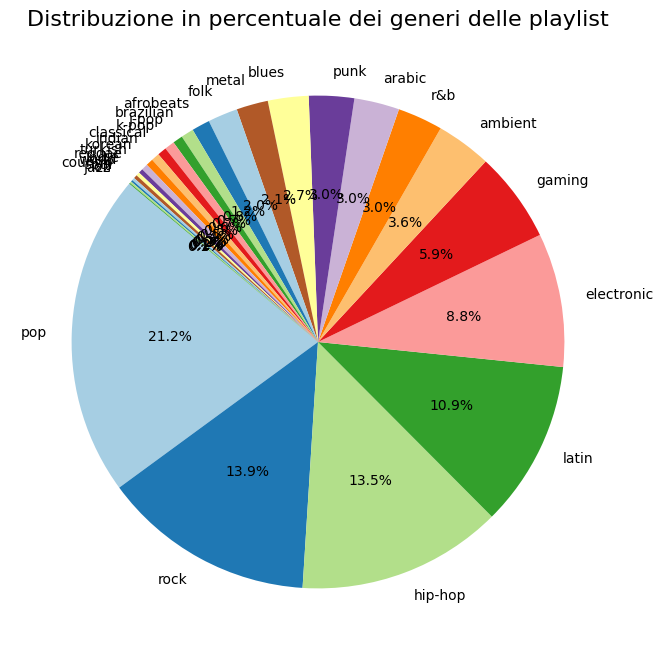

In [13]:
# Calcola la distribuzione dei generi delle playlist in percentuale
distribuzione_genere = df['playlist_genre'].value_counts(normalize=True) * 100

# Stampa i dati utilizzati per il grafico
print("Distribuzione in percentuale dei generi delle playlist:")
print(distribuzione_genere)

import matplotlib.pyplot as plt

# Imposta il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(distribuzione_genere, labels=distribuzione_genere.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)

# Aggiungi il titolo
plt.title('Distribuzione in percentuale dei generi delle playlist', fontsize=16)

# Mostra il grafico
plt.show()

**Se non riuscite a farlo ringraziate tiruz, baci <3**
